# seaborn

### seaborn - basic plots

- lineplot, scatterplot, countplot ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")  # 스타일 설정, 종류 찾아보기

In [2]:
tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")

In [3]:
fmri.sample(n=10, random_state=1)

,subject,timepoint,event,region,signal
806,s6,18,cue,parietal,0.019532
691,s5,15,cue,frontal,-0.019507
148,s5,8,stim,parietal,0.006805
676,s13,0,cue,parietal,-0.018394
156,s11,7,stim,parietal,0.254042
27,s1,17,stim,parietal,-0.038021
200,s11,4,stim,parietal,0.087175
262,s3,0,stim,parietal,-0.008576
94,s4,12,stim,parietal,-0.090036
339,s4,5,stim,frontal,0.455575


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

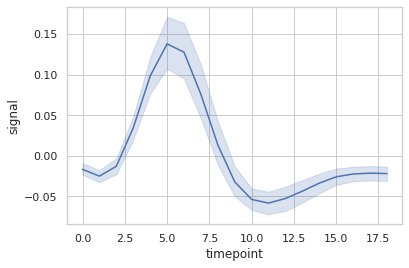

In [4]:
# Plot the responses for different events and regions
sns.set_style("whitegrid")
sns.lineplot(x="timepoint", y="signal", data=fmri)

# x : x 데이터, y : y 데이터, 둘 다시퀀스형 자료형
# data : pandas형 데이터

# 여기서 x, y 정렬 안되어있지만, seaborn이 정렬해준다
# 평균값으로 연결해서 선 그려준다(굵은선), 분포도 그려준다(넓은 부분)
# 그래프를 깔끔하게 그려주고, 손쉽게 볼 수 있게 해준다

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

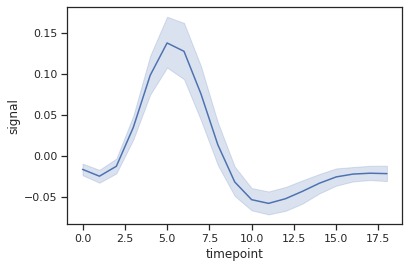

In [5]:
sns.set_style("ticks")
sns.lineplot(x="timepoint", y="signal", data=fmri)

In [6]:
fmri.sample(n=10, random_state=1)

,subject,timepoint,event,region,signal
806,s6,18,cue,parietal,0.019532
691,s5,15,cue,frontal,-0.019507
148,s5,8,stim,parietal,0.006805
676,s13,0,cue,parietal,-0.018394
156,s11,7,stim,parietal,0.254042
27,s1,17,stim,parietal,-0.038021
200,s11,4,stim,parietal,0.087175
262,s3,0,stim,parietal,-0.008576
94,s4,12,stim,parietal,-0.090036
339,s4,5,stim,frontal,0.455575


In [7]:
fmri["event"].unique()

array(['stim', 'cue'], dtype=object)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

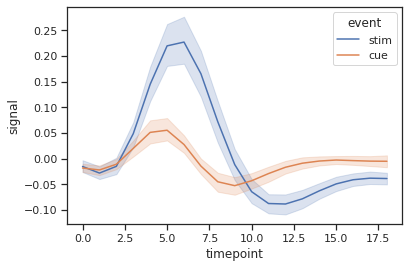

In [8]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

# x, y : numeric data
# hue : categorical data
# category에 따라 데이터가 어떻게 변하는지 볼 수 있다

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

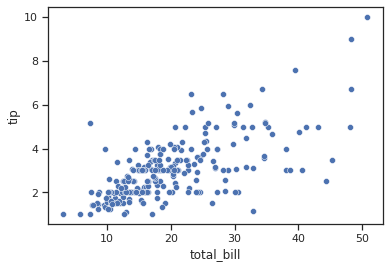

In [10]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

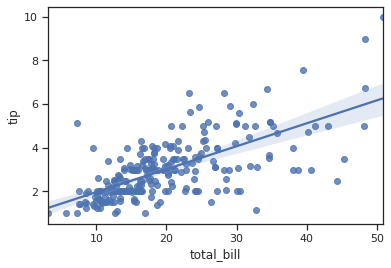

In [13]:
# scatterplot 비슷하면서도 추가적인 기능 제공 
# regression plot - 선형 회귀 라인을 그려준다
sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

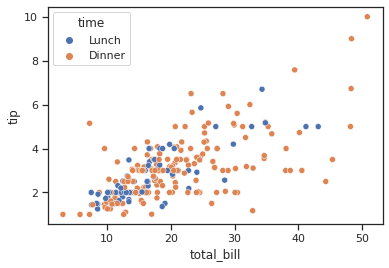

In [14]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

In [15]:
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


In [16]:
tips["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

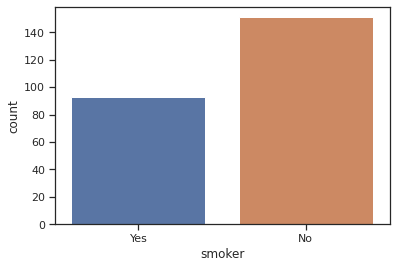

In [17]:
# countplot -> 카테고리 데이터를 위해
# 카테고리 데이터의 개수 세어준다
# pandas의 value_counts() -> 위에!

sns.countplot(x="smoker", data=tips)

<AxesSubplot:xlabel='smoker', ylabel='count'>

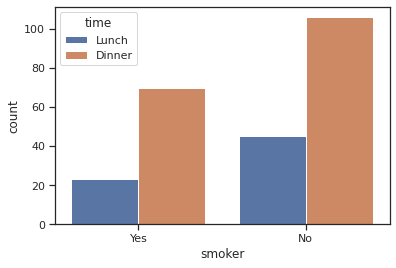

In [18]:
sns.countplot(x="smoker", hue="time", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

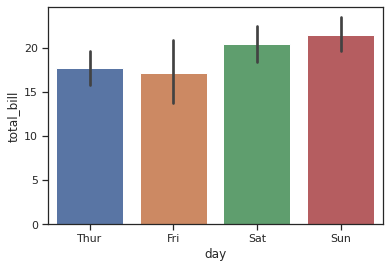

In [19]:
sns.barplot(x="day", y="total_bill", data=tips)

# barplot 값 -> 평균
# error 95% estimation -> 분포 그려준다

<AxesSubplot:xlabel='day', ylabel='total_bill'>

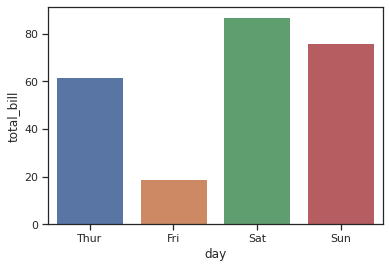

In [20]:
sns.barplot(x="day", y="total_bill", data=tips, estimator=len)

# estimator - 기본은 mean
# len은 데이터 길이

<AxesSubplot:xlabel='day', ylabel='total_bill'>

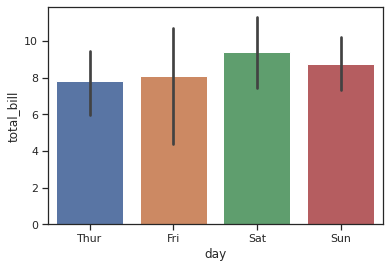

In [21]:
sns.barplot(x="day", y="total_bill", data=tips, estimator=np.std)

In [22]:
tips.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

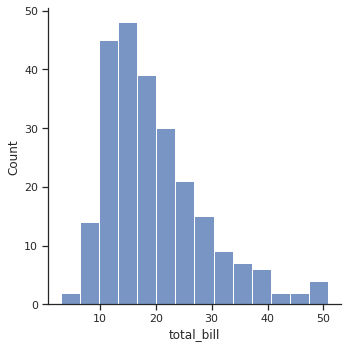

In [23]:
# displot : distribution plot
sns.displot(tips["total_bill"])

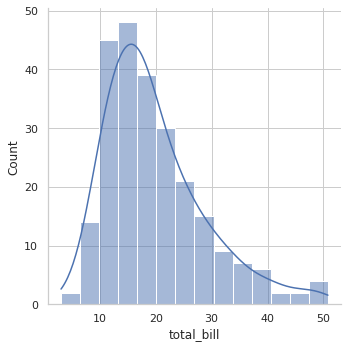

In [24]:
sns.displot(tips["total_bill"], kde=True)
# kde -> 분포의 곡선, 추정

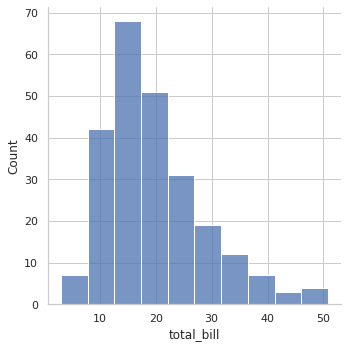

In [25]:
sns.displot(tips["total_bill"], bins=10, kde=False)
# bins : 막대기 10개로

### seaborn - predifined multiple plots

<AxesSubplot:xlabel='day', ylabel='total_bill'>

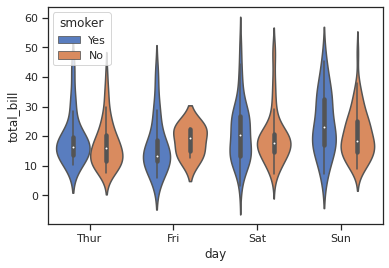

In [24]:
# boxplot과 비슷한 형태
# 분포(kde)까지 같이 볼 수 있다는 장점
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

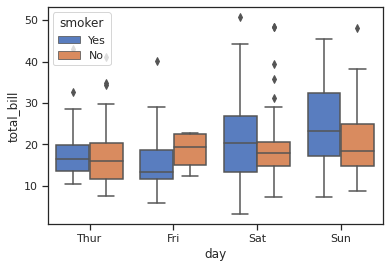

In [25]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

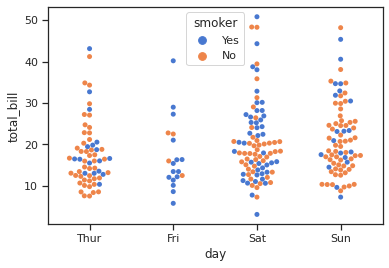

In [26]:
# 산점도 비슷하게 개수로 본다 -> 좀 더 정밀하게 볼 수 있다 
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

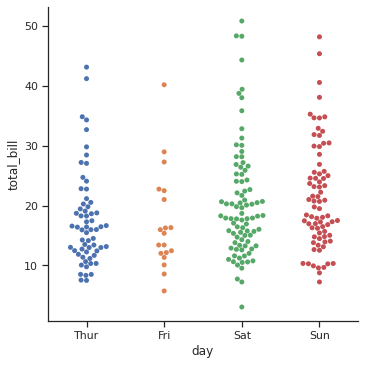

In [27]:
# category plot -> kind에 종류 넣어준다

sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

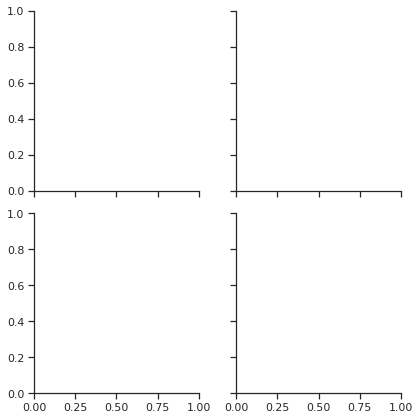

In [28]:
# 교수님이 제일 많이 쓰시는 것

q = sns.FacetGrid(tips, col="time", row="sex")
# 기본적인 판을 만들어준다
# 카테고리 데이터를 결합 분포로 볼 때 사용한다

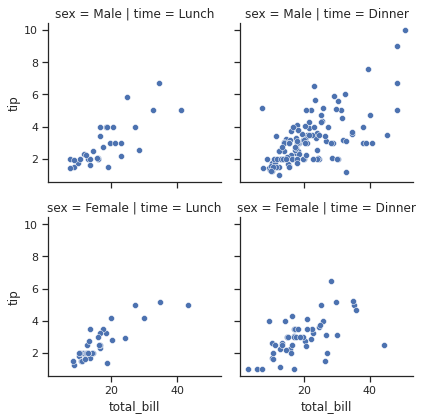

In [29]:
q = sns.FacetGrid(tips, col="time", row="sex")
q.map(sns.scatterplot, "total_bill", "tip")

# map으로, 각각 그리드에 들어가야 할 plot을 정해준다
# 여기서는 sns.scatterplot
# "total_bill" -> data
# "tip" -> "total_bill"과 "tip"간의 x,y 교차의 scatter map을 그려준다

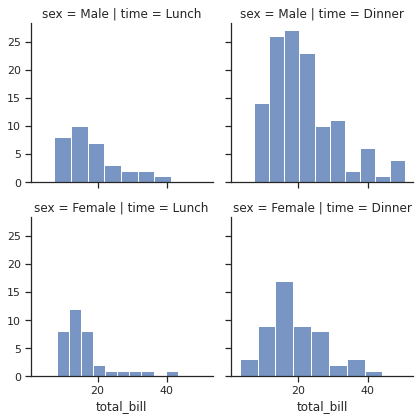

In [30]:
q = sns.FacetGrid(tips, col="time", row="sex")
q.map(sns.histplot, "total_bill")

### seaborn - multiple plots

/home/ugkim/Programs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ugkim/Programs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ugkim/Programs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)

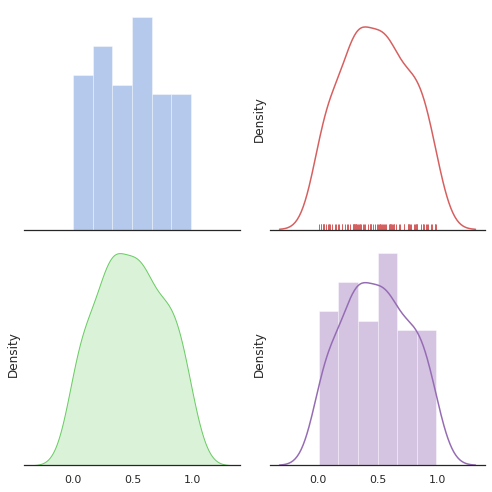

In [32]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

d = rs.random(size=100)

sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()